# Flower Classification
### Learning CLassification Matrix

Consider the iris dataset below.

We will be using this as an example to learn about Classification Metrices

In [52]:
# import libraries
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

In [53]:
iris = load_iris()

In [54]:
# separate input and output
x = iris.data
y = iris.target

In [55]:
x.shape

(150, 4)

In [56]:
# test_train_split
from sklearn.model_selection import train_test_split
# take 20% data as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [57]:
# using the K-nearest neighbours algorithm
from sklearn.neighbors import KNeighborsClassifier
# set the value of K to 1
knn = KNeighborsClassifier(n_neighbors=1)

In [58]:
# train the model
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [59]:
# predict using the test dataset
y_pred = knn.predict(x_test)

In [60]:
# compare the values from y_pred to y_test
print(y_pred)
print(y_test)

[1 0 2 0 2 0 1 2 0 2 1 1 2 2 0 2 2 1 0 0 1 0 2 1 2 0 1 1 2 0]
[1 0 2 0 2 0 2 2 0 2 1 1 2 2 0 2 2 1 0 0 1 0 2 1 2 0 1 1 2 0]


In [61]:
# calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)
# we are getting an accuracy of 90%
# since the test dataset is randimly selected te accuracy willl change slightly every time

0.9666666666666667

In [62]:
# now, for some fancy accuracy Vs K graphs
# we will train the same model for many values of K
# we will plot the accuracy Vs K to find the best K
accuracy = []
knn_range = range(1, 26)

for i in knn_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(accuracy_score(y_pred, y_test))

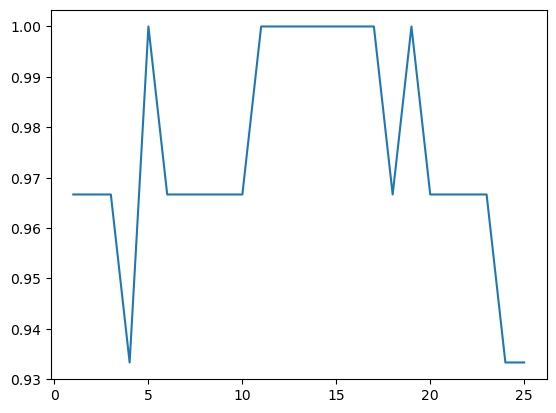

In [64]:
# plotting the graphs
import matplotlib.pyplot as plt
plt.plot(knn_range, accuracy)

Now we have the model trained and visuised for multiple values of K

In [66]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_pred, y_test)

array([[10,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 11]], dtype=int64)

This is a visulisation for the times the machine got it right...

Rows are the Actual Data and Columns are the Predictions....

For example, 
- (1,1) is the no of times the model correctly predicted sertosa as sertosa.
- (2,2) is where it correctly predicted virginica as virginica
- (2,3) where virginica was classified as vercicolor

The diagonal elemets are the ones that the machine got right.

In [70]:
# inorder to see the accuracy, precision, recall and F1 Score
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

